# Лекция 1. Предобработка данных.

* [Data Science проект](#ds)
* [1. Загрузка данных](#load)
* [2. Приведение типов данных](#types)
    * [Обзор количественных переменных](#numeric)
    * [Обзор номинативных переменных](#cats)
* [Статистика](#stats)
* [3. Обработка пропусков](#nan)
* [4. Обработка выбросов](#outlier)
* [5. Отбор и построение новых признаков](#feature)
    * [Категориальные переменные](#category)
        * [A) Бинарные (дамми) переменные](#dummy)
        * [Б) Feature encoding](#feature_encoding)
        * [B) Target encoding](#target_encoding)
    * [Вещественные переменные](#numeric_feature)
        * [A) Feature discretization](#feature_discretization)
        * [Б) Feature binarization](#feature_binarization)
* [6. Сохранение результатов](#save)
* [7. Подготовка данных в реальном проекте](#real)
* [Дополнительные вопросы](#additional)
    * [Определитель и ранг матрицы](#matrix)

### **Data Science проект:**<a class='anchor' id='ds'>
1. Постановка задачи
2. Получение данных
_________
3. **Анализ данных**
4. Визуализация данных
5. **Предобработка данных**
6. **Генерация новых признаков**
7. Построение модели
8. Оценка качества
______
9. Внедрение модели
10. Мониторинг качества и улучшение модели

**Подключение библиотек и скриптов**

In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd

from scipy.stats import mode

import warnings
warnings.filterwarnings('ignore')

**Пути к директориям и файлам**

In [3]:
DATASET_PATH = "/content/drive/My Drive/Colab Notebooks/Методы и средства реализации интеллектуальных задач/lection_1/housing.csv"
PREPARED_DATASET_PATH = "/content/drive/My Drive/Colab Notebooks/Методы и средства реализации интеллектуальных задач/lection_1/housing_prepared.csv"

In [4]:
!ls "/content/drive/My Drive/Colab Notebooks/Методы и средства реализации интеллектуальных задач/lection_1"

 1.jpeg				      lec_1_prac.ipynb
'1. Вычисления с помощью Numpy.pdf'   Lection_1_Part_1.ipynb
 housing.csv			      Lection_1_Part_2.ipynb
 housing_prepared.csv


### 1. Загрузка данных <a class='anchor' id='load'>

**Описание задачи**

Цель - предсказать стоимость недвижимости

Для чего это нужно?  

_В банках, страховых компаниях:_
- Узнать истинную стоимость имущества (залога)
- Принять решение о выдаче ипотеки/страховки
- Принять решение о % по ипотеке/страховке
  
_На площадках объявлений:_
- Найти недооцененные квартиры (~ выгодные предложения), показать их пользователям
- Показывать рыночную стоимость квартиры пользователям
- Для тех, кто продает квартиру, рекомендовать цену продажи

_Для инвесторов в недвижимость:_
- Определять рыночную стоимость квартир
- Поиск недооцененных активов
- Торговля на рынке недвижимости

**Описание датасета**

Статистические данные о ряде домов в Калифорнии, основанные на переписи 1990 года.

* **longitude** - долгота
* **latitude** - широта
* **housing_median_age** - средний возраст дома
* **total_rooms** - общее количество комнат
* **total_bedrooms** - общее количество спален
* **population** - количество проживающих
* **households** - домохозяйства
* **ocean_proximity** - близость океана
* **median_income** - средний доход
* **median_house_value** - средняя стоимость дома

In [5]:
df = pd.read_csv(DATASET_PATH, sep=',')
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,5
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,6
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,7
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,8
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,9


In [6]:
df.tail(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,20638
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND,20639


In [7]:
df.sample()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
431,-122.29,37.88,52.0,2159.0,424.0,824.0,388.0,3.8897,218400.0,NEAR BAY,431


In [8]:
df.sample(frac=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
7542,-118.21,33.90,35.0,2420.0,579.0,2010.0,540.0,2.0817,104600.0,<1H OCEAN,7542
11958,-117.40,33.90,32.0,1263.0,178.0,508.0,180.0,3.6667,314100.0,INLAND,11958
19061,-122.45,38.30,24.0,1946.0,400.0,718.0,380.0,3.5507,257900.0,NEAR BAY,19061
17712,-121.80,37.34,25.0,1642.0,297.0,1146.0,279.0,5.2088,231400.0,<1H OCEAN,17712
14660,-117.14,32.81,34.0,1748.0,294.0,800.0,294.0,4.4886,179100.0,NEAR OCEAN,14660
...,...,...,...,...,...,...,...,...,...,...,...
13658,-117.29,34.06,7.0,1971.0,403.0,1336.0,423.0,4.5066,111500.0,INLAND,13658
16628,-120.83,35.33,14.0,4155.0,787.0,2112.0,755.0,4.4766,192700.0,NEAR OCEAN,16628
709,-122.06,37.68,30.0,5367.0,1207.0,2667.0,1047.0,3.1796,170300.0,NEAR BAY,709
5354,-118.41,34.03,33.0,1730.0,386.0,994.0,363.0,3.7277,500001.0,<1H OCEAN,5354


In [9]:
df.shape

(20640, 11)

In [10]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'id'],
      dtype='object')

In [11]:
df.index

RangeIndex(start=0, stop=20640, step=1)

In [12]:
df['total_rooms']

0         880.0
1        7099.0
2        1467.0
3        1274.0
4        1627.0
          ...  
20635    1665.0
20636     697.0
20637    2254.0
20638    1860.0
20639    2785.0
Name: total_rooms, Length: 20640, dtype: float64

In [13]:
df.total_rooms

0         880.0
1        7099.0
2        1467.0
3        1274.0
4        1627.0
          ...  
20635    1665.0
20636     697.0
20637    2254.0
20638    1860.0
20639    2785.0
Name: total_rooms, Length: 20640, dtype: float64

In [14]:
df[['total_rooms', 'total_bedrooms']]

,total_rooms,total_bedrooms
0,880.0,129.0
1,7099.0,1106.0
2,1467.0,190.0
3,1274.0,235.0
4,1627.0,280.0
...,...,...
20635,1665.0,374.0
20636,697.0,150.0
20637,2254.0,485.0
20638,1860.0,409.0


In [15]:
df['population'] > 400

0        False
1         True
2         True
3         True
4         True
         ...  
20635     True
20636    False
20637    False
20638     True
20639     True
Name: population, Length: 20640, dtype: bool

In [ ]:
df[df['population'] > 400].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,5


In [ ]:
df[(df['population'] > 100) & (df['households'] > 100)].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4


In [ ]:
df[(df['population'] > 100) | (df['households'] > 100)].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4


In [ ]:
df[~(df['population'] > 100)].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
34,-122.27,37.83,51.0,2665.0,574.0,NaN,536.0,2.7303,109700.0,NEAR BAY,34
59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,59
61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,61
73,-122.29,37.81,46.0,12.0,4.0,18.0,7.0,0.4999,67500.0,NEAR BAY,73
121,-122.24,37.85,37.0,334.0,54.0,98.0,47.0,4.9643,335000.0,NEAR BAY,121


In [17]:
tmp = df[~(df['population'] > 100)]
tmp.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
34,-122.27,37.83,51.0,2665.0,574.0,NaN,536.0,2.7303,109700.0,NEAR BAY,34
59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,59
61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,61
73,-122.29,37.81,46.0,12.0,4.0,18.0,7.0,0.4999,67500.0,NEAR BAY,73
121,-122.24,37.85,37.0,334.0,54.0,98.0,47.0,4.9643,335000.0,NEAR BAY,121


In [22]:
tmp.loc[61]

longitude              -122.29
latitude                 37.82
housing_median_age        49.0
total_rooms              135.0
total_bedrooms            29.0
population                86.0
households                23.0
median_income           6.1183
median_house_value     75000.0
ocean_proximity       NEAR BAY
id                          61
Name: 61, dtype: object

In [19]:
tmp.iloc[0]

longitude              -122.27
latitude                 37.83
housing_median_age        51.0
total_rooms             2665.0
total_bedrooms           574.0
population                 NaN
households               536.0
median_income           2.7303
median_house_value    109700.0
ocean_proximity       NEAR BAY
id                          34
Name: 34, dtype: object

In [ ]:
tmp.loc[:62]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
34,-122.27,37.83,51.0,2665.0,574.0,NaN,536.0,2.7303,109700.0,NEAR BAY,34
59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,59
61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,61


In [ ]:
tmp.iloc[:5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
34,-122.27,37.83,51.0,2665.0,574.0,NaN,536.0,2.7303,109700.0,NEAR BAY,34
59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,59
61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,61
73,-122.29,37.81,46.0,12.0,4.0,18.0,7.0,0.4999,67500.0,NEAR BAY,73
121,-122.24,37.85,37.0,334.0,54.0,98.0,47.0,4.9643,335000.0,NEAR BAY,121


In [ ]:
tmp.iloc[-6:-1]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
20502,-118.68,34.33,45.0,121.0,25.0,67.0,27.0,2.9821,325000.0,<1H OCEAN,20502
20571,-121.99,38.53,6.0,4598.0,834.0,NaN,812.0,3.4186,127300.0,INLAND,20571
20624,-121.41,39.04,16.0,1698.0,300.0,NaN,291.0,3.0739,87200.0,INLAND,20624
20625,-121.52,39.12,37.0,102.0,17.0,29.0,14.0,4.1250,72000.0,INLAND,20625
20633,-121.53,39.19,27.0,2080.0,412.0,NaN,382.0,2.5495,98300.0,INLAND,20633


### 2. Приведение типов данных<a class='anchor' id='types'>

In [23]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
id                      int64
dtype: object

In [ ]:
type(df.longitude)

pandas.core.series.Series

In [ ]:
df['id'].dtype

dtype('int64')

In [ ]:
df['id'].values

array([    0,     1,     2, ..., 20637, 20638, 20639])

In [ ]:
type(df['id'].values)

numpy.ndarray

In [ ]:
df['id'] = df['id'].astype(str)
df['id'].dtype

dtype('O')

### Обзор количественных переменных<a class='anchor' id='numeric'>

In [24]:
df_num_features = df.select_dtypes(include=['float64', 'int64'])
df_num_features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,4


In [25]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,id
count,20640.000000,20640.000000,19918.000000,20640.000000,20433.000000,20041.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.471242,35.036934,28.653630,2635.763081,537.870553,1425.418243,499.539680,3.870671,206855.816909,10319.500000
std,5.041408,94.903955,12.576796,2181.615252,421.385070,1135.185798,382.329753,1.899822,115395.615874,5958.399114
min,-124.350000,-13534.030000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,786.000000,280.000000,2.563400,119600.000000,5159.750000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1165.000000,409.000000,3.534800,179700.000000,10319.500000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1726.000000,605.000000,4.743250,264725.000000,15479.250000
max,122.030000,1327.130000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,20639.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  19918 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20041 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
 10  id                  20640 non-null  int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 1.7+ MB


### Статистика<a class='anchor' id='stats'>

In [27]:
a = np.array([1, 2, 3, 4, 5])
a

array([1, 2, 3, 4, 5])

In [28]:
mean = a.sum() / len(a)
mean

3.0

In [30]:
variance = ((a - mean) ** 2).sum() / len(a)
std = np.sqrt(variance)
variance, std

(2.0, 1.4142135623730951)

In [29]:
mean_np = np.mean(a)
mean_np

3.0

In [31]:
std_np = np.std(a)
std_np

1.4142135623730951

In [32]:
a = [3, 4, 5, 6, 1, 2, 2, 6]
a = np.sort(a)
a

array([1, 2, 2, 3, 4, 5, 6, 6])

In [ ]:
len(a)

8

In [33]:
np.quantile(a, 0.5)

3.5

In [34]:
np.median(a)

3.5

In [ ]:
np.quantile(a, q=0.25)

2.0

In [ ]:
np.quantile(a, q=0.75)

5.25

In [35]:
mode(a)

ModeResult(mode=array([2]), count=array([2]))

In [ ]:
np.quantile(df['total_rooms'], q=0.5)

2127.0

In [ ]:
np.quantile(df['total_rooms'], q=0.25)

1447.75

In [36]:
df['total_rooms'].describe()

count    20640.000000
mean      2635.763081
std       2181.615252
min          2.000000
25%       1447.750000
50%       2127.000000
75%       3148.000000
max      39320.000000
Name: total_rooms, dtype: float64

In [37]:
df['total_rooms'].mode()

0    1527.0
dtype: float64

In [38]:
df['total_rooms'].value_counts()

1527.0     18
1613.0     17
1582.0     17
2127.0     16
1717.0     15
           ..
9614.0      1
10839.0     1
11872.0     1
6205.0      1
10035.0     1
Name: total_rooms, Length: 5926, dtype: int64

### Обзор номинативных переменных<a class='anchor' id='cats'>

In [39]:
df_obj_features = df.select_dtypes(include='object')
df_obj_features.head()

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY


In [40]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9127
INLAND        6542
NEAR OCEAN    2655
NEAR BAY      2288
-               23
ISLAND           5
Name: ocean_proximity, dtype: int64

In [41]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', '-', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [42]:
df['ocean_proximity'].nunique()

6

### 3. Обработка пропусков<a class='anchor' id='nan'>

Что можно делать с пропусками?
1. Выкинуть эти данные
2. Заменять пропуски разными методами (медианы, средние значения и т.д.)
3. Делать/не делать дополнительную "фичу"
4. Ничего не делать

In [44]:
df.isna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,True,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False,False


In [45]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age    722
total_rooms             0
total_bedrooms        207
population            599
households              0
median_income           0
median_house_value      0
ocean_proximity         0
id                      0
dtype: int64

**housing_median_age**

In [ ]:
df['housing_median_age_nan'] = 0
df.loc[df['housing_median_age'].isna(), 'housing_median_age_nan'] = 1

In [ ]:
df[df['housing_median_age_nan'] == 1]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan
25,-122.28,37.85,NaN,535.0,123.0,317.0,119.0,2.4038,107500.0,NEAR BAY,25,1
117,-122.25,37.83,NaN,4190.0,1105.0,1786.0,1037.0,3.0897,234100.0,NEAR BAY,117,1
138,-122.20,37.82,NaN,1229.0,181.0,420.0,176.0,7.0175,366700.0,NEAR BAY,138,1
170,-122.25,37.79,NaN,629.0,188.0,742.0,196.0,2.6458,125000.0,NEAR BAY,170,1
299,-122.17,37.76,NaN,1764.0,397.0,987.0,354.0,2.4333,98200.0,NEAR BAY,299,1
...,...,...,...,...,...,...,...,...,...,...,...,...
20531,-121.81,38.58,NaN,1964.0,314.0,808.0,286.0,5.9629,286000.0,INLAND,20531,1
20536,-121.73,38.55,NaN,1717.0,393.0,1224.0,387.0,2.7917,130800.0,INLAND,20536,1
20600,-121.57,39.16,NaN,1632.0,367.0,769.0,330.0,3.1029,71700.0,INLAND,20600,1
20601,-121.57,39.13,NaN,442.0,103.0,413.0,88.0,1.5694,57900.0,INLAND,20601,1


In [46]:
median = df['housing_median_age'].median()
df['housing_median_age'] = df['housing_median_age'].fillna(median)

**total_bedrooms**

In [47]:
median = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median, inplace=True)

**population**

In [48]:
median = df['population'].median()
df['population'].fillna(median, inplace=True)

**все вместе**

In [ ]:
medians = df[['housing_median_age', 'total_bedrooms', 'population']].median()
medians

housing_median_age      29.0
total_bedrooms         435.0
population            1165.0
dtype: float64

In [ ]:
df[['housing_median_age', 'total_bedrooms', 'population']] = \
        df[['housing_median_age', 'total_bedrooms', 'population']].fillna(medians)

In [49]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
id                    0
dtype: int64

**ocean_proximity**

In [50]:
df['ocean_proximity_nan'] = 0
df.loc[df['ocean_proximity'] == '-', 'ocean_proximity_nan'] = 1

In [51]:
df[df['ocean_proximity_nan'] == 1].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,ocean_proximity_nan
1153,-121.46,39.54,14.0,5549.0,1000.0,1822.0,919.0,2.9562,142300.0,-,1153,1
2435,-119.59,36.57,19.0,1733.0,303.0,911.0,281.0,3.5987,131700.0,-,2435,1
2636,-124.15,40.59,39.0,1186.0,238.0,539.0,212.0,2.0938,79600.0,-,2636,1
5980,-117.74,34.10,26.0,2723.0,604.0,1847.0,498.0,2.6779,136000.0,-,5980,1
6373,-118.02,34.15,44.0,2419.0,437.0,1045.0,432.0,3.8750,280800.0,-,6373,1


In [52]:
df['ocean_proximity'].mode()

0    <1H OCEAN
dtype: object

In [53]:
df['ocean_proximity'].mode()[0]

'<1H OCEAN'

In [54]:
df.replace(
    {'ocean_proximity':
     {'-': df['ocean_proximity'].mode()[0]}
    },
    inplace=True)

In [55]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9150
INLAND        6542
NEAR OCEAN    2655
NEAR BAY      2288
ISLAND           5
Name: ocean_proximity, dtype: int64

### 4. Обработка выбросов<a class='anchor' id='outlier'>

Что можно делать с выбросами?
1. Выкинуть эти данные
2. Заменять выбросы разными методами (медианы, средние значения и т.д.)
3. Делать/не делать дополнительную фичу
4. Ничего не делать

In [56]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,id,ocean_proximity_nan
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.471242,35.036934,28.665746,2635.763081,536.838857,1417.860562,499.539680,3.870671,206855.816909,10319.500000,0.001114
std,5.041408,94.903955,12.355019,2181.615252,419.391878,1119.445348,382.329753,1.899822,115395.615874,5958.399114,0.033364
min,-124.350000,-13534.030000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000
25%,-121.800000,33.930000,19.000000,1447.750000,297.000000,797.000000,280.000000,2.563400,119600.000000,5159.750000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1165.000000,409.000000,3.534800,179700.000000,10319.500000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1701.000000,605.000000,4.743250,264725.000000,15479.250000,0.000000
max,122.030000,1327.130000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,20639.000000,1.000000



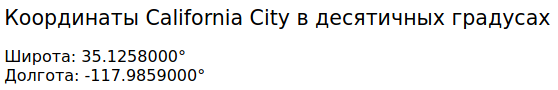

**longitude**

In [57]:
df[df['longitude'] >= 0]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,ocean_proximity_nan
3479,118.51,34.29,29.0,1287.0,194.0,525.0,187.0,6.4171,319300.0,<1H OCEAN,3479,0
5904,118.43,34.29,39.0,1769.0,410.0,1499.0,390.0,3.1212,153500.0,<1H OCEAN,5904,0
8405,118.36,33.93,40.0,1625.0,500.0,2036.0,476.0,2.6298,156500.0,<1H OCEAN,8405,0
8636,118.41,33.88,43.0,2492.0,449.0,1033.0,437.0,7.9614,500001.0,<1H OCEAN,8636,0
13051,121.29,38.61,17.0,13553.0,2474.0,6544.0,2359.0,3.9727,132700.0,INLAND,13051,0
15263,117.27,33.02,21.0,2144.0,340.0,928.0,344.0,5.7980,286100.0,NEAR OCEAN,15263,0
17085,0.00,37.47,33.0,1266.0,415.0,1991.0,334.0,2.9200,202800.0,NEAR OCEAN,17085,0
17359,0.00,34.88,4.0,3680.0,559.0,1678.0,569.0,5.0639,201700.0,<1H OCEAN,17359,0
18551,122.03,36.96,28.0,1607.0,421.0,926.0,385.0,2.4250,216100.0,NEAR OCEAN,18551,0
19423,0.00,37.69,5.0,9601.0,1639.0,4449.0,1575.0,4.5332,195500.0,INLAND,19423,0


In [59]:
df['longitude_outlier'] = 0
df.loc[df['longitude'] >= 0, 'longitude_outlier'] = 1

In [60]:
df[df['longitude'] >= 0]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,ocean_proximity_nan,longitude_outlier
3479,118.51,34.29,29.0,1287.0,194.0,525.0,187.0,6.4171,319300.0,<1H OCEAN,3479,0,1
5904,118.43,34.29,39.0,1769.0,410.0,1499.0,390.0,3.1212,153500.0,<1H OCEAN,5904,0,1
8405,118.36,33.93,40.0,1625.0,500.0,2036.0,476.0,2.6298,156500.0,<1H OCEAN,8405,0,1
8636,118.41,33.88,43.0,2492.0,449.0,1033.0,437.0,7.9614,500001.0,<1H OCEAN,8636,0,1
13051,121.29,38.61,17.0,13553.0,2474.0,6544.0,2359.0,3.9727,132700.0,INLAND,13051,0,1
15263,117.27,33.02,21.0,2144.0,340.0,928.0,344.0,5.7980,286100.0,NEAR OCEAN,15263,0,1
17085,0.00,37.47,33.0,1266.0,415.0,1991.0,334.0,2.9200,202800.0,NEAR OCEAN,17085,0,1
17359,0.00,34.88,4.0,3680.0,559.0,1678.0,569.0,5.0639,201700.0,<1H OCEAN,17359,0,1
18551,122.03,36.96,28.0,1607.0,421.0,926.0,385.0,2.4250,216100.0,NEAR OCEAN,18551,0,1
19423,0.00,37.69,5.0,9601.0,1639.0,4449.0,1575.0,4.5332,195500.0,INLAND,19423,0,1


In [61]:
df.loc[df['longitude'] > 0, 'longitude'] * -1

3479    -118.51
5904    -118.43
8405    -118.36
8636    -118.41
13051   -121.29
15263   -117.27
18551   -122.03
Name: longitude, dtype: float64

In [62]:
df.loc[df['longitude'] > 0, 'longitude'] = df.loc[df['longitude'] > 0, 'longitude'] * -1

In [63]:
df.loc[df['longitude'] == 0, 'longitude'] = df['longitude'].median()

**latitude**

In [64]:
df[(df['latitude'] <= 0) | (df['latitude'] > 50)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,ocean_proximity_nan,longitude_outlier
8283,-118.13,-13534.03,45.0,1016.0,172.0,361.0,163.0,7.5000,434500.0,NEAR OCEAN,8283,0,0
12772,-121.42,1327.13,29.0,2217.0,536.0,1203.0,507.0,1.9412,73100.0,INLAND,12772,0,0


In [65]:
df['latitude_outlier'] = 0
df.loc[(df['latitude'] <= 0) | (df['latitude'] > 50), 'latitude_outlier'] = 1

In [66]:
df[(df['latitude'] <= 0) | (df['latitude'] > 50)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,ocean_proximity_nan,longitude_outlier,latitude_outlier
8283,-118.13,-13534.03,45.0,1016.0,172.0,361.0,163.0,7.5000,434500.0,NEAR OCEAN,8283,0,0,1
12772,-121.42,1327.13,29.0,2217.0,536.0,1203.0,507.0,1.9412,73100.0,INLAND,12772,0,0,1


In [67]:
df.loc[(df['latitude'] <= 0) | (df['latitude'] > 50), 'latitude'] = df['latitude'].median()

In [68]:
df[(df['latitude'] <= 0) | (df['latitude'] > 50)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,ocean_proximity_nan,longitude_outlier,latitude_outlier


### 5. Отбор и построение новых признаков<a class='anchor' id='feature'>

**Исключаем признак "id"**

In [69]:
df.drop('id', axis=1, inplace=True)


In [70]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_nan,longitude_outlier,latitude_outlier
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1165.0,433.0,1.7000,92300.0,INLAND,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0,0,0


**Количественные переменные**

In [71]:
# Доля спален в общем кол-ве комнат
df['bedroom_share'] = df['total_bedrooms'] / df['total_rooms'] * 100

# Сколько человек в среднем живут в одной комнате
df['population_per_room'] = df['population'] / df['total_rooms']

In [72]:
df[['bedroom_share', 'population_per_room']].head()

,bedroom_share,population_per_room
0,14.659091,0.365909
1,15.579659,0.338217
2,12.951602,0.338105
3,18.445840,0.437991
4,17.209588,0.347265


**Категориальные переменные**<a class='anchor' id='category'>

Неплохой обзор по работе с категориальными признаками можно посмотреть [здесь](https://dyakonov.org/2016/08/03/python-%D0%BA%D0%B0%D1%82%D0%B5%D0%B3%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5-%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%B8/)

In [73]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9150
INLAND        6542
NEAR OCEAN    2655
NEAR BAY      2288
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
1 < 2 < 3 < 4 < 5

True

**A) Бинарные (дамми) переменные**<a class='anchor' id='dummy'>

In [74]:
pd.get_dummies(df['ocean_proximity'])

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [75]:
df = pd.concat([df, pd.get_dummies(df['ocean_proximity'])], axis=1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_nan,longitude_outlier,latitude_outlier,bedroom_share,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,14.659091,0.365909,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,15.579659,0.338217,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,12.951602,0.338105,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,18.445840,0.437991,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,17.209588,0.347265,0,0,0,1,0


**Б) Feature encoding**<a class='anchor' id='feature_encoding'>

описание категории каким-то числом

In [ ]:
df_cat = df.groupby('ocean_proximity').median()['total_rooms']
df_cat = pd.DataFrame(df_cat)

df_cat

,total_rooms
ocean_proximity,
<1H OCEAN,2108.0
INLAND,2130.0
ISLAND,1675.0
NEAR BAY,2083.0
NEAR OCEAN,2197.0


In [76]:
df_cat = df.groupby('ocean_proximity', as_index=False).median()[['ocean_proximity', 'total_rooms']]
df_cat = pd.DataFrame(df_cat)

df_cat

,ocean_proximity,total_rooms
0,<1H OCEAN,2108.0
1,INLAND,2130.0
2,ISLAND,1675.0
3,NEAR BAY,2083.0
4,NEAR OCEAN,2197.0


In [77]:
df_cat.rename(columns={'total_rooms': 'median_rooms'}, inplace=True)

df_cat.sort_values(by='median_rooms')

,ocean_proximity,median_rooms
2,ISLAND,1675.0
3,NEAR BAY,2083.0
0,<1H OCEAN,2108.0
1,INLAND,2130.0
4,NEAR OCEAN,2197.0


In [ ]:
df['total_rooms'].median()

2127.0

In [78]:
df = df.merge(df_cat, on='ocean_proximity')

df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,...,longitude_outlier,latitude_outlier,bedroom_share,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_rooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,...,0,0,14.659091,0.365909,0,0,0,1,0,2083.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,...,0,0,15.579659,0.338217,0,0,0,1,0,2083.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,...,0,0,12.951602,0.338105,0,0,0,1,0,2083.0


**B) Target encoding**<a class='acnhor' id='target_encoding'>

описание категории целевой переменной

In [81]:
df_target = df.groupby('ocean_proximity', as_index=False).median()[['ocean_proximity', 'median_house_value']]
df_target = pd.DataFrame(df_target)

df_target

,ocean_proximity,median_house_value
0,<1H OCEAN,214700.0
1,INLAND,108500.0
2,ISLAND,414700.0
3,NEAR BAY,234050.0
4,NEAR OCEAN,229500.0


In [82]:
df_target.rename(columns={'median_house_value': 'median_value'}, inplace=True)

df_target.sort_values(by='median_value')

,ocean_proximity,median_value
1,INLAND,108500.0
0,<1H OCEAN,214700.0
4,NEAR OCEAN,229500.0
3,NEAR BAY,234050.0
2,ISLAND,414700.0


In [83]:
df = df.merge(df_target, on='ocean_proximity')

df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,...,latitude_outlier,bedroom_share,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_rooms,median_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,...,0,14.659091,0.365909,0,0,0,1,0,2083.0,234050.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,...,0,15.579659,0.338217,0,0,0,1,0,2083.0,234050.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,...,0,12.951602,0.338105,0,0,0,1,0,2083.0,234050.0


**Вещественные переменные**<a class='acnhor' id='numeric_feature'>

**A) Feature discretization** <a class='acnhor' id='feature_discretization'>

**возраст дома (0-100)**

1 категория - новые дома (до 5 лет),<br>2 категория - дома от 5 до 10<br>...


In [84]:
df['housing_median_age'].describe()

count    20640.000000
mean        28.665746
std         12.355019
min          1.000000
25%         19.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

In [86]:
def age_to_cat(X):

    X['age_cat'] = 0

    X.loc[X['housing_median_age'] <= 5, 'age_cat'] = 1  
    X.loc[(X['housing_median_age'] > 5) & (X['housing_median_age'] <= 10), 'age_cat'] = 2
    X.loc[(X['housing_median_age'] > 10) & (X['housing_median_age'] <= 25), 'age_cat'] = 3
    X.loc[X['housing_median_age'] > 25, 'age_cat'] = 4

    return X

In [87]:
df = age_to_cat(df)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,...,bedroom_share,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_rooms,median_value,age_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,...,14.659091,0.365909,0,0,0,1,0,2083.0,234050.0,4
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,...,15.579659,0.338217,0,0,0,1,0,2083.0,234050.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,...,12.951602,0.338105,0,0,0,1,0,2083.0,234050.0,4
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,...,18.445840,0.437991,0,0,0,1,0,2083.0,234050.0,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,...,17.209588,0.347265,0,0,0,1,0,2083.0,234050.0,4


**Б) Feature binarization** <a class='anchor' id='feature_binarization'>

[Статья на эту тему](https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789808452/1/ch01lvl1sec17/binarization)
только 2 признака

1 - новый дом,<br>0 - старый

In [88]:
def age_to_binary_cat(X):

    X['age_binary_cat'] = 0
    X.loc[X['housing_median_age'] <= 5, 'age_binary_cat'] = 1  

    return X

In [89]:
df = age_to_binary_cat(df)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,...,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_rooms,median_value,age_cat,age_binary_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,...,0.365909,0,0,0,1,0,2083.0,234050.0,4,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,...,0.338217,0,0,0,1,0,2083.0,234050.0,3,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,...,0.338105,0,0,0,1,0,2083.0,234050.0,4,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,...,0.437991,0,0,0,1,0,2083.0,234050.0,4,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,...,0.347265,0,0,0,1,0,2083.0,234050.0,4,0


### Обобщение
* Генерация новых признаков
    1. Категориальные признаки
        * pd.get_dummies
        * Feature Encoding
        * Target Encoding
    2. Вещественные признаки
        * Feature discretization
        * Feature binarization

### 6. Сохранение результатов<a class='anchor' id='save'>

In [90]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,...,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_rooms,median_value,age_cat,age_binary_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,...,0.365909,0,0,0,1,0,2083.0,234050.0,4,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,...,0.338217,0,0,0,1,0,2083.0,234050.0,3,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,...,0.338105,0,0,0,1,0,2083.0,234050.0,4,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,...,0.437991,0,0,0,1,0,2083.0,234050.0,4,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,...,0.347265,0,0,0,1,0,2083.0,234050.0,4,0


In [91]:
df.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8', sep=';')

### 7. Подготовка данных в реальном проекте<a class='anchor' id='real'>

In [92]:
import numpy as np
import pandas as pd

In [ ]:
class DataPipeline:
    """Подготовка исходных данных"""
    
    def __init__(self):
        """Параметры класса"""
        self.medians = None
        self.longitude_median = None
        self.latitude_median = None
        
    def fit(self, df):
        """Сохранение статистик"""
        
        # Расчет медиан
        self.medians = df[['population', 'housing_median_age', 'total_bedrooms']].median()
        self.longitude_median = df['longitude'].median()
        self.latitude_median = df['latitude'].median()
        
    def transform(self, df):
        """Трансформация данных"""
        
        # 1. Пропуски
        df[['population', 'housing_median_age', 'total_bedrooms']] =\
            df[['population', 'housing_median_age', 'total_bedrooms']].fillna(self.medians)
        
        
        # 2. Выбросы (outliers)
        df.loc[df['longitude'] > 0, 'longitude'] = df.loc[df['longitude'] > 0, 'longitude'] * -1
        df.loc[df['longitude'] == 0, 'longitude'] = self.longitude_median
        df.loc[(df['latitude'] <= 0) | (df['latitude'] > 50), 'latitude'] = self.latitude_median
        
        
        # 3. Новые фичи (features)
        
        # Доля спален в общем кол-ве комнат
        df['bedroom_share'] = df['total_bedrooms'] / df['total_rooms'] * 100

        # Сколько человек в среднем живут в одной комнате
        df['population_per_room'] = df['population'] / df['total_rooms']
        
        # 4. Обработка категорий
        df = pd.concat([df, pd.get_dummies(df['ocean_proximity'])], axis=1)
        
        return df


In [ ]:
DATASET_PATH = 'housing.csv'
PREPARED_DATASET_PATH = 'housing_prepared.csv'

In [ ]:
df = pd.read_csv(DATASET_PATH, sep=',')

pipe = DataPipeline()
pipe.fit(df)
df = pipe.transform(df)

df.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8')

FileNotFoundError: ignored

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,...,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_rooms,median_value,age_cat,age_binary_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,...,0.365909,0,0,0,1,0,2083.0,234050.0,4,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,...,0.338217,0,0,0,1,0,2083.0,234050.0,3,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,...,0.338105,0,0,0,1,0,2083.0,234050.0,4,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,...,0.437991,0,0,0,1,0,2083.0,234050.0,4,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,...,0.347265,0,0,0,1,0,2083.0,234050.0,4,0


In [ ]:
df.isnull().sum()

longitude                 0
latitude                  0
housing_median_age        0
total_rooms               0
total_bedrooms            0
population                0
households                0
median_income             0
median_house_value        0
ocean_proximity           0
housing_median_age_nan    0
ocean_proximity_nan       0
longitude_outlier         0
latitude_outlier          0
bedroom_share             0
population_per_room       0
<1H OCEAN                 0
INLAND                    0
ISLAND                    0
NEAR BAY                  0
NEAR OCEAN                0
median_rooms              0
median_value              0
age_cat                   0
age_binary_cat            0
dtype: int64